## Observations


1. There is a clear curve to the temperature vs latitude plot which clearly shows that temperature drops as you move North or South of the Equator 
2. There is higher variance in humidity levels north of the Equator  
3. Wind speeds are higher further North and South of the Equator 

In [48]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import time 
import openweathermapy.core as owm
import scipy, pylab
from citipy import citipy
from collections import defaultdict

output_data = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List 

In [49]:
lat_lng = defaultdict()

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for x in lat_lngs:
    lat, long = x
    city = citipy.nearest_city(lat, long).city_name
    lat_lng[city] = (lat, long)
    print(f'Retrieving City:{city} at :{lat,long}')   

Retrieving City:kapaa at :(29.599322746083985, -165.40791444954556)
Retrieving City:tual at :(-5.6013657761244104, 134.23088594498682)
Retrieving City:carnarvon at :(-18.648965032370356, 103.3257745867885)
Retrieving City:sucua at :(-2.633410261861087, -78.08632966085486)
Retrieving City:bilma at :(21.095516934635867, 12.000261623935842)
Retrieving City:yulara at :(-25.853100890152078, 129.4120482656731)
Retrieving City:jamestown at :(-31.461455188850962, -8.742308225539176)
Retrieving City:souillac at :(-52.35390390075516, 74.24969094195353)
Retrieving City:izhma at :(65.67842247465688, 54.97591169945636)
Retrieving City:ry at :(56.05320350932189, 9.735200124633536)
Retrieving City:cape town at :(-57.5663861293312, 3.911503644806942)
Retrieving City:cabo san lucas at :(10.003538280908614, -120.92877411190267)
Retrieving City:mahebourg at :(-47.79765511850376, 77.11635910623289)
Retrieving City:rikitea at :(-39.41645535213843, -137.57553124339776)
Retrieving City:popondetta at :(-9.219

Retrieving City:cape town at :(-76.69852363336793, -11.666095337348935)
Retrieving City:bluff at :(-85.9258884216768, 154.9350062736561)
Retrieving City:kapaa at :(30.069493592743697, -160.4706333486412)
Retrieving City:yellowknife at :(78.61832244026016, -111.7460603363941)
Retrieving City:new norfolk at :(-89.33317551964329, 129.0736826546622)
Retrieving City:asfi at :(32.05725402640901, -11.38615807959576)
Retrieving City:tual at :(-8.702975158004165, 133.39612689833882)
Retrieving City:nizhneyansk at :(88.63115837603627, 137.79752627942247)
Retrieving City:saint-philippe at :(-46.84365449542622, 68.85935514781445)
Retrieving City:mys shmidta at :(82.1960594243499, -170.5013755008226)
Retrieving City:chiang rai at :(19.77069959542567, 99.22511650246554)
Retrieving City:castro at :(-44.768485568089, -74.68332757132852)
Retrieving City:mataura at :(-37.76080572490057, -152.5376720659524)
Retrieving City:calvia at :(39.8093924729223, 2.46017607627698)
Retrieving City:miraflores at :(0.

Retrieving City:cape town at :(-79.11475770868147, -15.46695937496807)
Retrieving City:yellowknife at :(73.7384488243924, -102.92119141595644)
Retrieving City:sao filipe at :(12.58757482283879, -35.934740576760106)
Retrieving City:vaini at :(-71.44292669748337, -178.35602852359247)
Retrieving City:bredasdorp at :(-88.37163151431008, 22.48171215874902)
Retrieving City:lagoa at :(50.10543683818858, -30.979074979134936)
Retrieving City:walvis bay at :(-25.1813772124853, 9.344869491886442)
Retrieving City:leh at :(34.99973483265312, 79.70545434231786)
Retrieving City:bud at :(72.58386069761474, 3.564791463875366)
Retrieving City:dikson at :(74.81335369146595, 81.25882118859255)
Retrieving City:touros at :(0.4422232672499433, -32.11299557121282)
Retrieving City:saldanha at :(-34.745859999593286, 14.157111253681734)
Retrieving City:arraial do cabo at :(-40.51257053025827, -29.919935306909082)
Retrieving City:kiknur at :(57.18340592488579, 47.47323454770523)
Retrieving City:cape town at :(-82

Retrieving City:hermanus at :(-89.82819630465664, -1.6453306660269789)
Retrieving City:tasiilaq at :(71.8830684695736, -34.24195893851254)
Retrieving City:hilo at :(10.421648286204316, -159.29963039709216)
Retrieving City:saint-philippe at :(-39.68236008396432, 61.84909632688405)
Retrieving City:pisco at :(-26.78948866999449, -100.25541539206654)
Retrieving City:morgan city at :(28.706744853775504, -91.6844264973189)
Retrieving City:ishigaki at :(22.183893113601215, 125.34803144115085)
Retrieving City:tuatapere at :(-63.26161505336842, 155.33316355882152)
Retrieving City:puerto ayora at :(-9.535510774818434, -104.86290346947244)
Retrieving City:soyo at :(-6.984135600671209, 10.150975133016175)
Retrieving City:yellowknife at :(63.282364108155235, -111.37367615101554)
Retrieving City:rikitea at :(-48.38459345544187, -135.3362496332118)
Retrieving City:vaini at :(-23.880188020542718, -177.6113463950049)
Retrieving City:lebu at :(-36.96808711152141, -82.4806165538242)
Retrieving City:sabla

In [41]:
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ['city', 'lat_long']
df['latitude'] = df.lat_long.map(lambda x: str(x[0]))
df['longitude'] = df.lat_long.map(lambda x: str(x[1]))
df.head()

,city,lat_long,latitude,longitude
0,bitburg,"(50.19320810162219, 6.507907221055234)",50.19320810162219,6.507907221055234
1,dikson,"(80.10386155305878, 76.50904618487147)",80.10386155305878,76.50904618487147
2,champerico,"(8.08076221479152, -93.93927807031008)",8.08076221479152,-93.93927807031008
3,hobart,"(-85.7651853018006, 132.35028996151948)",-85.7651853018006,132.35028996151948
4,hermanus,"(-76.1586276953876, 4.375210729674706)",-76.1586276953876,4.375210729674706


## Perform API Calls 

In [42]:
def get_current_weather(df_object):
    api_key = "bcc7f5cb5f80358c534beef5124a9cb4"
    base_url =  "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID': api_key,
        'lat' : df_object.latitude,
        'lon': df_object.longitude,
        'units': 'Imperial'
    }
    data = requests.get(base_url, params = params)
    time.sleep(.50)
    return data.json()

## City DataFrame

In [20]:
city_data = df.sample(n=500)
city_data['weather_json'] = city_data.apply(get_current_weather, axis=1)
city_data['country'] = city_data.weather_json.map(lambda x: x.get('sys').get('country'))
city_data['temp'] = city_data.weather_json.map(lambda x: x.get('main').get('temp'))
city_data['clouds'] = city_data.weather_json.map(lambda x: x.get('clouds').get('all'))
city_data['humidity'] = city_data.weather_json.map(lambda x: x.get('main').get('humidity'))
city_data['max_temp'] = city_data.weather_json.map(lambda x: x.get('main').get('temp_max'))
city_data['wind_speed'] = city_data.weather_json.map(lambda x: x.get('wind').get('speed'))
city_data['Date'] = city_data.weather_json.map(lambda x: x.get('dt'))
city_data.head()


,city,lat_long,latitude,longitude,weather_json,country,temp,clouds,humidity,max_temp,wind_speed,Date
222,acapulco,"(10.75328362511631, -102.33327714243974)",10.75328362511631,-102.33327714243974,"{'coord': {'lon': -102.33, 'lat': 10.75}, 'wea...",None,81.03,64,100,81.03,11.77,1529532525
326,bria,"(6.834809069687168, 23.614736511730854)",6.834809069687168,23.614736511730854,"{'coord': {'lon': 23.61, 'lat': 6.83}, 'weathe...",CF,70.86,76,91,70.86,3.38,1529532490
594,miyako,"(40.38655105123095, 144.0285339334302)",40.38655105123095,144.0285339334302,"{'coord': {'lon': 144.03, 'lat': 40.39}, 'weat...",None,58.35,92,95,58.35,11.99,1529532491
118,baoding,"(39.216394742721576, 115.61889656164658)",39.216394742721576,115.61889656164658,"{'coord': {'lon': 115.62, 'lat': 39.22}, 'weat...",CN,67.44,0,80,67.44,3.38,1529532528
553,verkhnetulomskiy,"(68.48769071938068, 31.031957545600534)",68.48769071938068,31.031957545600534,"{'coord': {'lon': 31.03, 'lat': 68.49}, 'weath...",RU,50.70,92,100,50.70,2.71,1529532529


In [43]:
city_data['latitude'] = city_data['latitude'].astype(float)
type(city_data['latitude'].values[0])
dep_var = city_data['latitude']


## Latitude vs Temperature Plot 

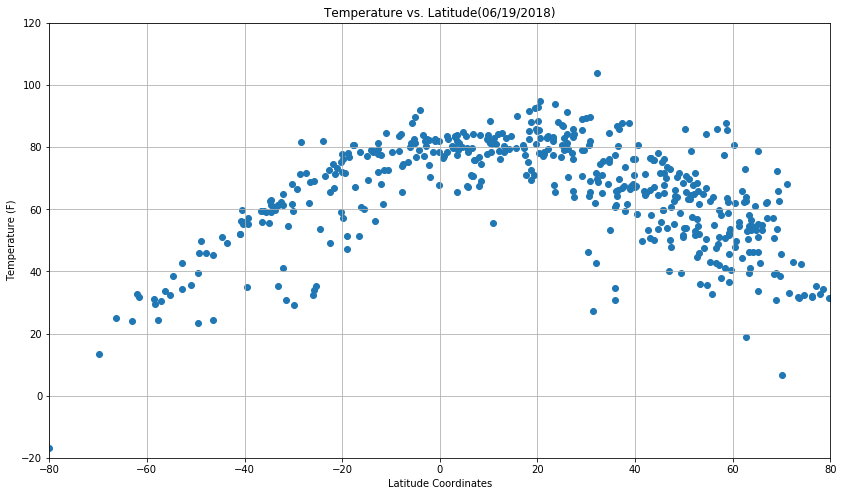

In [44]:
plt.scatter(dep_var, city_data.temp)

pylab.ylim([-20,120])
pylab.xlim([-80, 80])


plt.xlabel("Latitude Coordinates")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.title("Temperature vs. Latitude(06/19/2018)")

pylab.rcParams['figure.figsize'] = (14,8)
plt.savefig("TemperaturevLatitude.png")

## Humidity vs Temperature Plot 

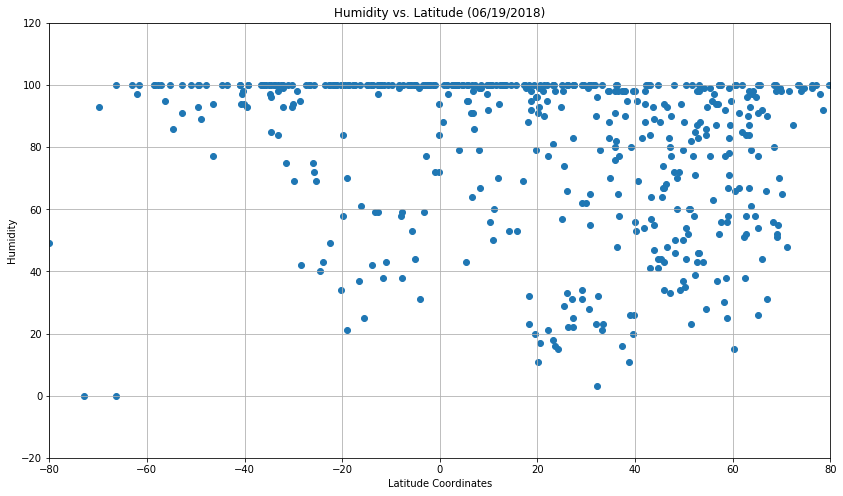

In [45]:
plt.scatter(dep_var, city_data.humidity)

plt.ylim(-20, 120)
pylab.xlim([-80, 80])
plt.grid(True)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (06/19/2018)")

pylab.rcParams['figure.figsize'] = (14,8)
plt.savefig("HumidityvLatitude.png")

## Clouds vs Latitude Plot

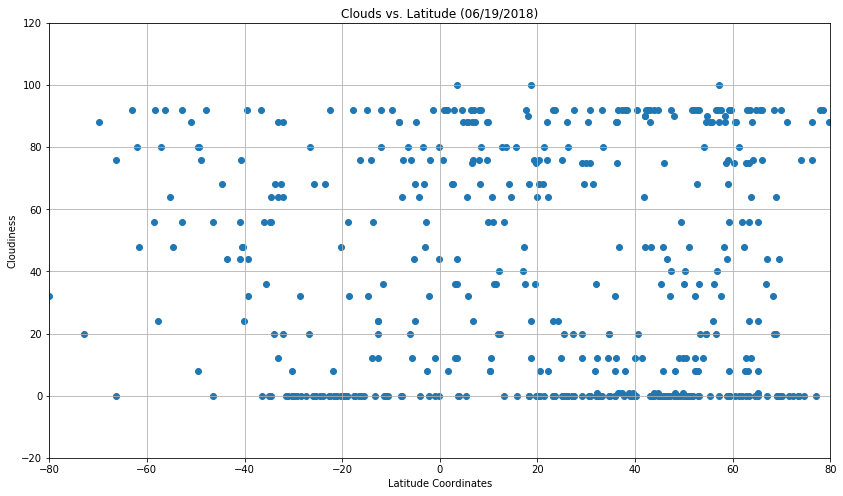

In [46]:
plt.scatter(dep_var, city_data.clouds)

plt.ylim(-20, 120)
pylab.xlim([-80, 80])
plt.grid(True)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Cloudiness")
plt.title("Clouds vs. Latitude (06/19/2018)")

pylab.rcParams['figure.figsize'] = (14,8)
plt.savefig("CloudsvLatitude.png")

## Wind Speed vs. Latitude Plot

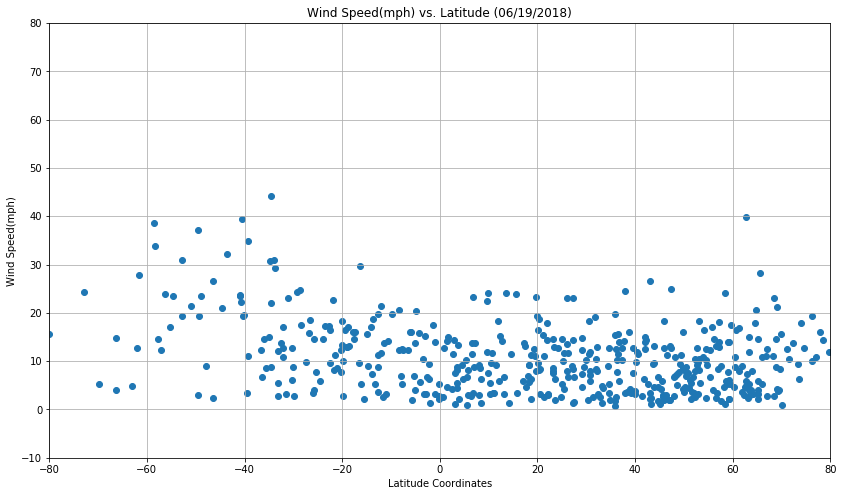

In [47]:
plt.scatter(dep_var, city_data.wind_speed)

plt.ylim(-10, 80)
pylab.xlim([-80, 80])
plt.grid(True)

plt.xlabel("Latitude Coordinates")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed(mph) vs. Latitude (06/19/2018)")

pylab.rcParams['figure.figsize'] = (14,8)
plt.savefig("Wind Speed(mph)vLatitude.png")